In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
#from keras. utils.vis_utils import plot_model
#from keras.callbacks import EarlyStopping,ModelCheckpoint
#from keras.optimizers import Adam 

In [2]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [5]:
pip install pydot tensorflow keras


  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/9a/fd/df3932340498a8f38c6107c95b0eb1d9ac406c5ea1307c8f43408977378e/pydot-3.0.1-py3-none-any.whl.metadata


In [8]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
df = pd.read_csv('TATAMOTORS.csv')
df.head

<bound method NDFrame.head of             Date      Symbol Series  Prev Close   Open    High     Low  \
0     03-01-2000       TELCO     EQ      201.60  207.4  217.25  207.40   
1     04-01-2000       TELCO     EQ      216.75  217.0  219.00  206.00   
2     05-01-2000       TELCO     EQ      208.20  194.0  217.80  194.00   
3     06-01-2000       TELCO     EQ      213.25  215.0  229.90  215.00   
4     07-01-2000       TELCO     EQ      222.10  224.0  239.90  223.10   
...          ...         ...    ...         ...    ...     ...     ...   
5301  26-04-2021  TATAMOTORS     EQ      294.00  297.0  299.00  294.60   
5302  27-04-2021  TATAMOTORS     EQ      295.40  295.7  302.50  295.10   
5303  28-04-2021  TATAMOTORS     EQ      301.50  303.5  309.50  303.00   
5304  29-04-2021  TATAMOTORS     EQ      305.90  308.9  310.00  301.25   
5305  30-04-2021  TATAMOTORS     EQ      301.90  298.2  301.30  292.55   

        Last   Close    VWAP    Volume          Turnover    Trades  \
0     217.0

In [12]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,26-04-2021,TATAMOTORS,EQ,294.0,297.0,299.0,294.60,295.85,295.40,296.48,30583139,906738645495000,173282.0,3291167.0,0.1076
5302,27-04-2021,TATAMOTORS,EQ,295.4,295.7,302.5,295.10,302.10,301.50,299.05,35040532,1047879314215000,191627.0,5215100.0,0.1488
5303,28-04-2021,TATAMOTORS,EQ,301.5,303.5,309.5,303.00,305.15,305.90,307.22,44668126,1372277783930000,264159.0,5116568.0,0.1145
5304,29-04-2021,TATAMOTORS,EQ,305.9,308.9,310.0,301.25,302.20,301.90,304.77,36647292,1116899790029990,186996.0,4193346.0,0.1144
5305,30-04-2021,TATAMOTORS,EQ,301.9,298.2,301.3,292.55,293.10,293.85,297.01,36121668,1072848726265000,227806.0,7898988.0,0.2187


In [13]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,14487752460000,NaN,NaN,NaN
1,04-01-2000,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,14229618695000,NaN,NaN,NaN
2,05-01-2000,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,23576835995000,NaN,NaN,NaN
3,06-01-2000,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,44359324810000,NaN,NaN,NaN
4,07-01-2000,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,51976361765000,NaN,NaN,NaN


In [14]:
df = df.dropna()
df = df[df['Volume']!=0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 2850 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2456 non-null   object 
 1   Symbol              2456 non-null   object 
 2   Series              2456 non-null   object 
 3   Prev Close          2456 non-null   float64
 4   Open                2456 non-null   float64
 5   High                2456 non-null   float64
 6   Low                 2456 non-null   float64
 7   Last                2456 non-null   float64
 8   Close               2456 non-null   float64
 9   VWAP                2456 non-null   float64
 10  Volume              2456 non-null   int64  
 11  Turnover            2456 non-null   int64  
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  2456 non-null   float64
 14  %Deliverble         2456 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 30

In [16]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2.456000e+03,2.456000e+03,2.456000e+03,2.456000e+03,2456.000000
mean,338.292427,338.539434,343.419055,333.012154,337.938111,337.966103,338.266067,1.975154e+07,4.578209e+14,1.284400e+05,4.715857e+06,0.381272
std,165.346598,165.198158,166.656582,163.019423,164.580474,164.641337,164.704793,2.942314e+07,6.243924e+14,1.049546e+05,4.145755e+06,0.165086
min,65.300000,66.500000,66.900000,63.500000,65.450000,65.300000,65.500000,2.139050e+05,6.687446e+12,3.434000e+03,4.822300e+04,0.038500
25%,200.212500,199.800000,204.012500,197.050000,199.812500,200.212500,199.330000,5.764092e+06,2.191787e+14,7.547825e+04,2.480143e+06,0.251025
50%,321.350000,322.950000,329.100000,316.125000,321.075000,320.775000,320.970000,9.006632e+06,2.946448e+14,1.000340e+05,3.663376e+06,0.404200
75%,436.512500,436.562500,441.450000,431.200000,436.125000,436.462500,436.660000,1.823141e+07,4.441745e+14,1.420648e+05,5.551896e+06,0.506525
max,1095.300000,1096.000000,1097.000000,1075.600000,1077.250000,1079.900000,1083.360000,3.905778e+08,9.365671e+15,1.318669e+06,7.333848e+07,0.847900


In [17]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', df. shape)
print('Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (2456, 15)
Null Value Present:  False


<Axes: >

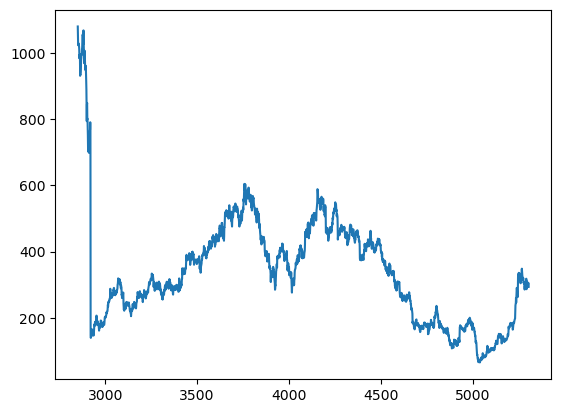

In [18]:
#Plot the Close Value
df['Close'].plot()

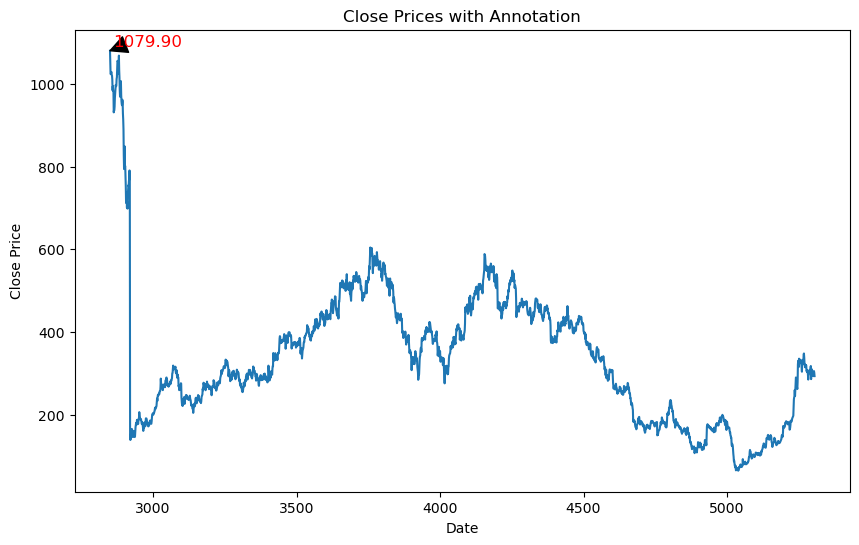

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Assuming 'df' is already loaded and has a 'Close' column
df['Close'].plot(figsize=(10, 6))

# Choose the index or value you want to annotate
index_to_annotate = df['Close'].idxmax()  # Example: annotate the max value
value_to_annotate = df['Close'].max()

# Annotate the graph
plt.annotate(f'{value_to_annotate:.2f}',  # The label with the value
             xy=(index_to_annotate, value_to_annotate),  # The point to annotate
             xytext=(index_to_annotate + 10, value_to_annotate + 10),  # Position of the label
             arrowprops=dict(facecolor='black', shrink=0.05),  # Arrow properties
             fontsize=12,  # Font size for the annotation
             color='red')  # Color of the text

# Add labels and title
plt.title('Close Prices with Annotation')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show the plot
plt.show()


In [20]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])

#Selecting the Feature
features = ['Open', 'Low', 'High', 'Volume']

In [21]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features]) # Scalling 
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index) # Convert to saprate Dataframe 
feature_transform.head()

,Open,Low,High,Volume
2850,1.000000,1.000000,1.000000,0.005632
2851,0.974745,0.966999,0.973789,0.006123
2852,0.953375,0.939383,0.962140,0.008674
2853,0.917921,0.935431,0.936705,0.004772
2854,0.923264,0.940767,0.938647,0.004877


In [22]:
#Splitting to Training set and Test set

timesplit=TimeSeriesSplit(n_splits=5,test_size=int(len(df)*0.2)) # number of split 
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [23]:
# Printing the shape of Training and Test set 
print("Traning shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("Traning Data percentage:", (X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100)
print("Test Data percentage:", (X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100)

Traning shape: (1965, 4)
Test shape: (491, 4)
Traning Data percentage: 80.00814332247556
Test Data percentage: 19.99185667752443


In [24]:
#Process the data for LSTM & reshape the data for LSTM to (batch_size, timesteps, input_dim) 

trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

print("Traning shape:", X_train.shape)
print("Test shape:", X_test.shape)

Traning shape: (1965, 1, 4)
Test shape: (491, 1, 4)


In [25]:
from tensorflow.keras.regularizers import l2


#Building the LSTM Model

lstm = Sequential()
lstm.add(LSTM(units=256, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True, 
            kernel_regularizer=l2(0.001), 
            use_bias=True))

lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=64, activation='relu', return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=16, activation='relu', return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(Dense(1))

# optimizer = Adam(learning_rate=0.001) 
optimizer = 'adam'

lstm.compile(loss='mean_squared_error', 
             optimizer= optimizer, #'adam',
            )

# plot_model(lstm, show_shapes=True, show_layer_names=True)

lstm.summary()

C:\Users\Nisarg Patel\anaconda3\Anaconda 2.0\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 256)         │       267,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 16)          │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 518,993 (1.98 MB)

 Trainable params: 518,993 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Checkpoint & Early Stopping
Model_checkpoint_path = "TataMotors_Stock_Price_Prediction.keras"  # Corrected extension

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ModelCheckpoint(Model_checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
]

# Assuming you have a model and data prepared, you would fit the model like this:
# history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=callbacks)



In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Checkpoint & Early Stopping
Model_checkpoint_path = "TataMotors_Stock_Price_Prediction.keras"  # Corrected extension

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ModelCheckpoint(Model_checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
]

# Assuming your LSTM model is defined as 'lstm'
with tf.device('/GPU:0'):  # Ensure the GPU is used
    history = lstm.fit(X_train, 
                       y_train, 
                       validation_data=(X_test, y_test),
                       epochs=500, 
                       batch_size=128,
                       verbose=1, 
                       shuffle=False, 
                       callbacks=callbacks)  # Corrected variable name to 'callbacks'


Epoch 1/500
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 209963.4219
Epoch 1: val_loss improved from inf to 31431.42773, saving model to TataMotors_Stock_Price_Prediction.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - loss: 202871.4531 - val_loss: 31431.4277
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 204979.1719
Epoch 2: val_loss improved from 31431.42773 to 31416.95703, saving model to TataMotors_Stock_Price_Prediction.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 202847.3281 - val_loss: 31416.9570
Epoch 3/500
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 209886.3750
Epoch 3: val_loss improved from 31416.95703 to 31367.89844, saving model to TataMotors_Stock_Price_Prediction.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 202791.3281 - val_loss: 31367.8984
Epoch 4/500
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 207004.0312
Epoch 4: val_loss improved from 31367.89844 to 30980.27344, saving model to TataMotors_Stock_Price_Prediction.keras
16/16

In [30]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred.shape

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step


(491, 1, 1)

In [31]:
y_pred = y_pred.reshape(-1,1)
y_pred.shape

(491, 1)

In [32]:
y_test.shape

(491,)

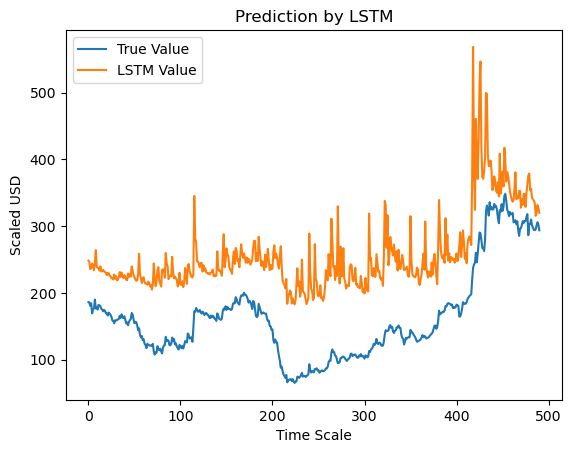

In [33]:
from matplotlib import pyplot as plt

#Predicted vs True Adj Close Value – LSTM

plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


In [36]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Correct the file path if necessary
file_path = 'TATAMOTORS.csv'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file at {file_path} was not found.")
else:
    # Load and prepare the test data
    df_test = pd.read_csv(file_path)
    df_test = df_test.dropna()
    df_test = df_test[df_test['Volume'] != 0]

    # Select the features and the target
    X_test = df_test[['Open', 'Low', 'High', 'Volume']]
    y_test = df_test['Close']

    # Assuming 'scaler' has been defined and fitted during training
    X_test_scaled = scaler.transform(X_test)

    # Reshape the test data to match the input shape expected by the LSTM model
    X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Predict the close prices using the LSTM model
    predictions = lstm.predict(X_test_scaled, verbose=0)

    # Reshape predictions and true values to be 1D arrays
    predictions = predictions.flatten()
    y_test = y_test.values

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")

    # Optional: Print out the first few predictions alongside the actual values
    df_results = pd.DataFrame({
        'Actual': y_test,
        'Predicted': predictions,
        'Difference': y_test - predictions
    })

    print(df_results.head())


Mean Squared Error (MSE): 4793.156169048013
Mean Absolute Error (MAE): 54.26449293453452
   Actual   Predicted  Difference
0  1079.9  850.325439  229.574561
1  1048.2  828.905212  219.294788
2  1023.8  814.434753  209.365247
3  1023.7  796.482422  227.217578
4  1027.2  799.701355  227.498645


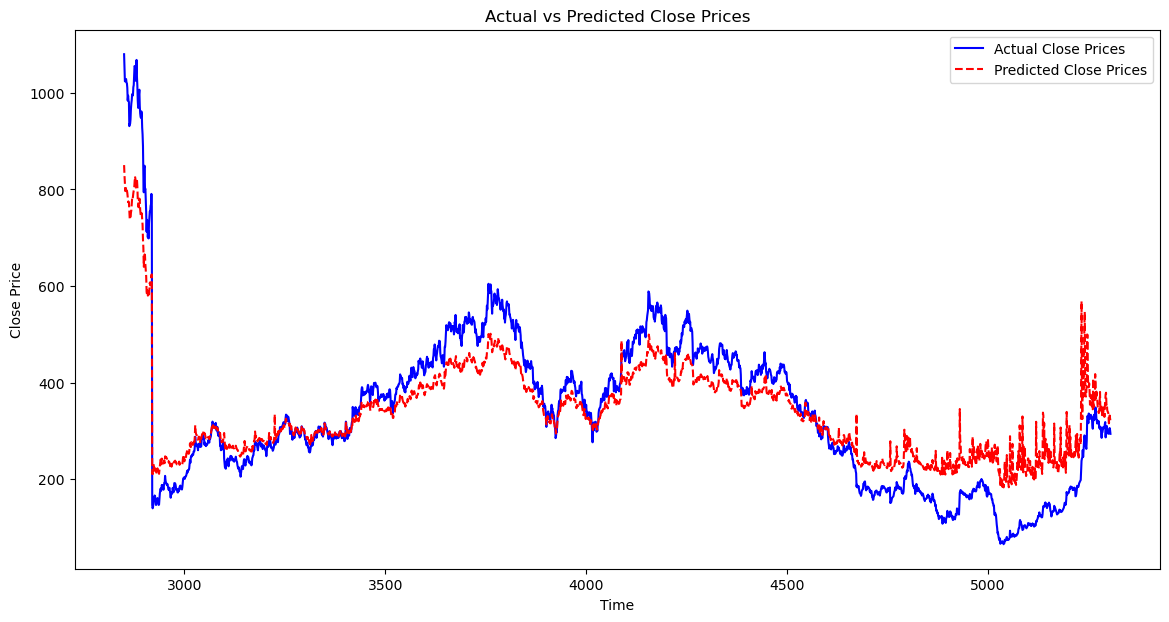

In [37]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted close prices
plt.figure(figsize=(14, 7))
plt.plot(df_test.index, y_test, color='blue', label='Actual Close Prices')
plt.plot(df_test.index, predictions, color='red', linestyle='--', label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [38]:
lstm.save('TataMotors_Stock_Price_Prediction_Model_LSTM_v1.h5')

In [39]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler_v1.save')

['scaler_v1.save']

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%
